In [2]:
import pandas as pd
import numpy as np
import pytimetk as tk

In [3]:
raw_df=pd.read_csv('mediamix_sales.csv', parse_dates=['Time'])

# Mixed Media Model Notebook

In this notebook, my hope is to showcase ongoing efforts to learn about Media Mixed Model methods as applied using PYMC and how they can be applied to real world cases. I have chosen to work with a data set taken from kaggel for this exercise.

## Description of Data
### Source
- [https://www.kaggle.com/datasets/mediaearth/traditional-and-digital-media-impact-on-sales](https://www.kaggle.com/datasets/mediaearth/traditional-and-digital-media-impact-on-sales)
### Period
- Monthy Intervals from 1/01 to 08/17
### Media Variables
- tv_sponsorships
- tv_cricket 
- tv_RON
- radio 
- NPP 
- Magazines 
- OOH: Out Of Home Spend (Billboards, ect.) 
- Social: Social Media Spend 
- Programmatic 
- Display_Rest 
- Search 
- Native 
### Target Variable
- sales
### Assumptions
- 

## Exploring The Data

In [4]:
raw_df.head()

,Time,tv_sponsorships,tv_cricket,tv_RON,radio,NPP,Magazines,OOH,Social,Programmatic,Display_Rest,Search,Native,sales
0,2001-01-01,119.652,66.729,43.719,37.8,55.36,13.84,35,41.8782,5,33.50256,26.802048,5,22100
1,2001-01-02,23.140,12.905,8.455,39.3,36.08,9.02,35,8.0990,5,6.47920,5.183360,6,10400
2,2001-01-03,8.944,4.988,3.268,45.9,55.44,13.86,35,3.1304,5,2.50432,2.003456,7,9300
3,2001-01-04,78.780,43.935,28.785,41.3,46.80,11.70,35,27.5730,5,22.05840,17.646720,5,18500
4,2001-01-05,94.016,52.432,34.352,10.8,46.72,11.68,35,32.9056,5,26.32448,21.059584,7,12900


In [5]:
raw_df.shape

(200, 14)

<Axes: >

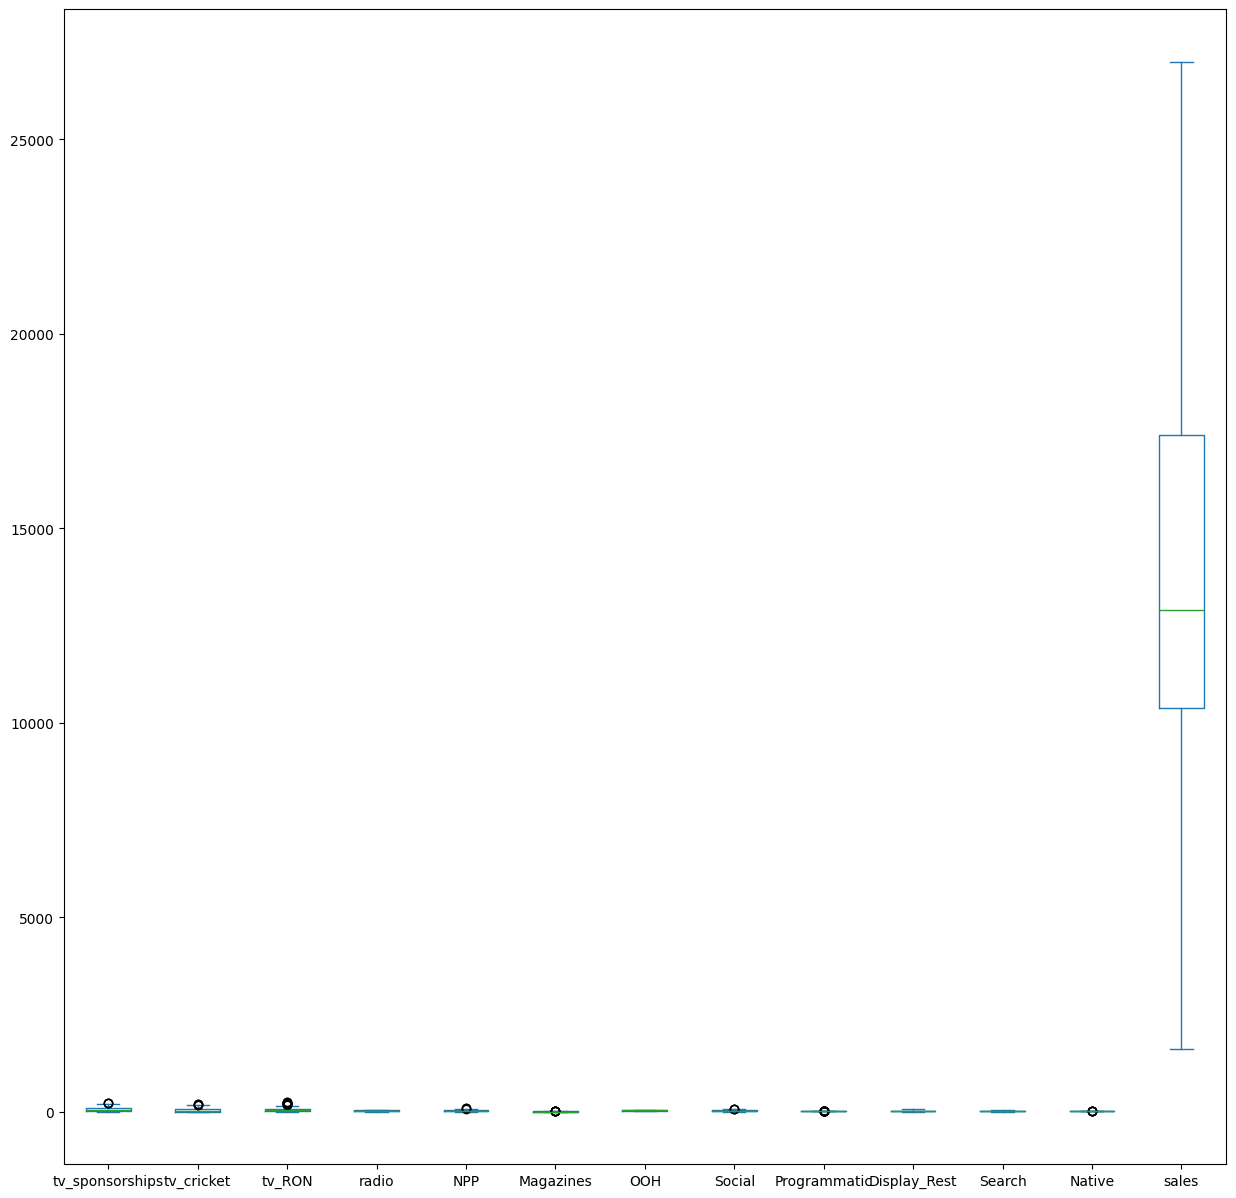

In [6]:
raw_df.plot.box(figsize=(15, 15))

<Axes: >

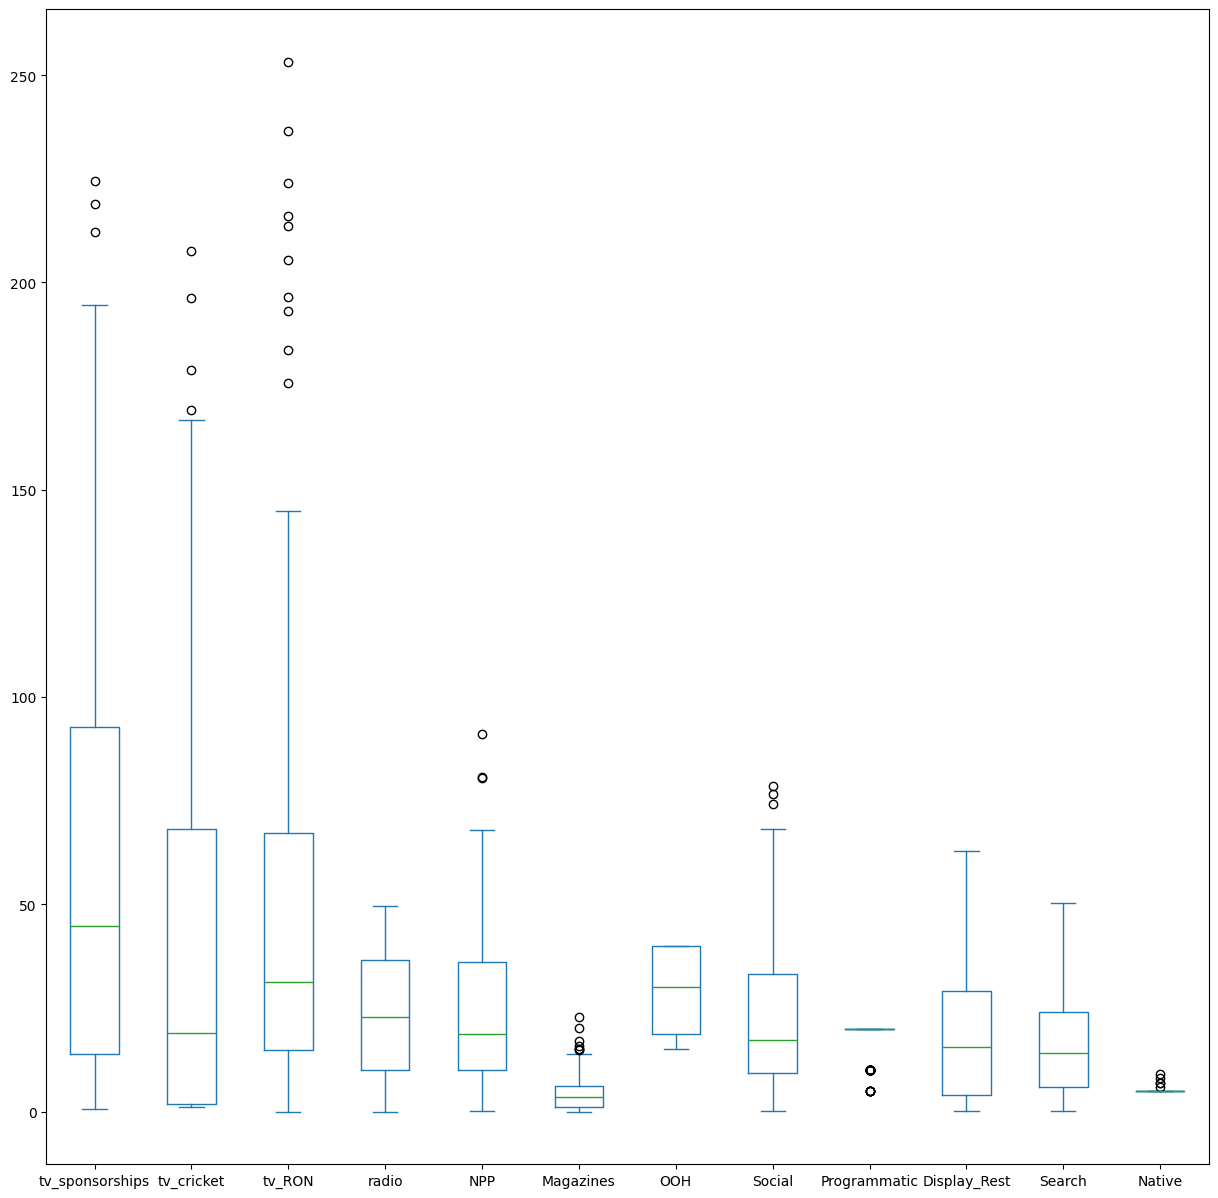

In [7]:
raw_df.drop('sales', axis=1).plot.box(figsize=(15, 15))

In [8]:
raw_df.describe()

,Time,tv_sponsorships,tv_cricket,tv_RON,radio,NPP,Magazines,OOH,Social,Programmatic,Display_Rest,Search,Native,sales
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2008-11-08 14:52:48,59.512390,41.657365,51.143055,23.264000,24.372700,4.543300,29.350000,21.925009,17.650000,18.090883,15.664170,5.060000,14022.500000
min,2001-01-01 00:00:00,0.700000,1.000000,0.000000,0.000000,0.270000,0.030000,15.000000,0.245000,5.000000,0.196000,0.156800,5.000000,1600.000000
25%,2005-01-02 18:00:00,14.017500,1.750000,14.935000,9.975000,10.000000,1.015000,18.750000,9.259250,20.000000,3.986500,5.925920,5.000000,10375.000000
50%,2009-01-04 12:00:00,44.705000,19.022000,31.330000,22.900000,18.800000,3.420000,30.000000,17.329375,20.000000,15.584800,14.106848,5.000000,12900.000000
75%,2013-01-06 06:00:00,92.777500,68.286500,67.262500,36.525000,36.080000,6.185000,40.000000,33.302500,20.000000,29.134560,23.966880,5.000000,17400.000000
max,2017-01-08 00:00:00,224.560000,207.480000,253.260000,49.600000,91.200000,22.800000,40.000000,78.596000,20.000000,62.876800,50.301440,9.000000,27000.000000
std,NaN,50.672105,49.165205,52.431041,14.846809,18.054915,4.187503,10.103858,17.342664,4.508785,14.692380,11.355416,0.408945,5217.456566


In [9]:
raw_df.melt(
    id_vars=['Time'],
    value_vars=['tv_sponsorships','tv_cricket','tv_RON',
    'radio','NPP','Magazines','OOH','Social','Programmatic','Display_Rest','Search','Native','sales']
) \
    .groupby('variable') \
        .plot_timeseries(
            'Time', 'value',
            color_column='variable',
            facet_ncol = 2,
            width = 600,
            height = 800,
            legend_show = True
        )

Was the correct ammount of smoothing addded to the trendlines for these data? Must consider if anything of value is said here.

In [10]:
#Do I need all of the figures presented here to make my case?

total_spend_per_channel =raw_df[['tv_sponsorships','tv_cricket','tv_RON',
    'radio','NPP','Magazines','OOH','Social','Programmatic','Display_Rest','Search','Native']].sum(axis=0)
total_revenue = raw_df.sales.sum()
spend_ratio = total_spend_per_channel / total_spend_per_channel.sum()
print(total_revenue)
print(total_spend_per_channel)
print(total_revenue / total_spend_per_channel)


2804500
tv_sponsorships    11902.478000
tv_cricket          8331.473000
tv_RON             10228.611000
radio               4652.800000
NPP                 4874.540000
Magazines            908.660000
OOH                 5870.000000
Social              4385.001900
Programmatic        3530.000000
Display_Rest        3618.176560
Search              3132.833984
Native              1012.000000
dtype: float64
tv_sponsorships     235.623204
tv_cricket          336.615146
tv_RON              274.181900
radio               602.755330
NPP                 575.336339
Magazines          3086.412960
OOH                 477.768313
Social              639.566428
Programmatic        794.475921
Display_Rest        775.114192
Search              895.195856
Native             2771.245059
dtype: float64


### Preparing to build model

In [11]:
print(spend_ratio)


tv_sponsorships    0.190603
tv_cricket         0.133418
tv_RON             0.163798
radio              0.074508
NPP                0.078059
Magazines          0.014551
OOH                0.094000
Social             0.070220
Programmatic       0.056528
Display_Rest       0.057940
Search             0.050168
Native             0.016206
dtype: float64


In [12]:
p_sigmas = 12 * spend_ratio.to_numpy()

p_sigmas.tolist()

[2.2872309213387667,
 1.6010113747657468,
 1.9655735017150082,
 0.8941018862462939,
 0.9367123900840373,
 0.17461197987374427,
 1.1280042280488618,
 0.8426406615336102,
 0.6783398509390941,
 0.6952842346690437,
 0.6020187358990051,
 0.19447023488678844]

## Modeling

In [25]:

from pymc_marketing.mmm import MMM, GeometricAdstock, LogisticSaturation
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation
from pymc_marketing.prior import Prior

import arviz as az 
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz as gr

In [22]:
seed: int = sum(map(ord, "mmm"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

In [14]:
x = raw_df.drop('sales', axis=1)
y = raw_df['sales']

In [15]:
mmm_model_config = {
    "intercept": Prior("Normal", mu=0.5, sigma=0.2),
    "saturation_beta": Prior("HalfNormal", sigma=p_sigmas),
    "gamma_control": Prior("Normal", mu=0, sigma=0.05),
    "gamma_fourier": Prior("Laplace", mu=0, b=0.2),
    "likelihood": Prior("Normal", sigma=Prior("HalfNormal", sigma=6)),
}

In [16]:
mmm_sampler_config = {"progressbar": True}

In [17]:
mmm = MMM(
    model_config=mmm_model_config,
    sampler_config=mmm_sampler_config,
    date_column='Time',
    adstock=GeometricAdstock(l_max=8),
    saturation=LogisticSaturation(),
    channel_columns=['tv_sponsorships','tv_cricket','tv_RON',
    'radio','NPP','Magazines','OOH','Social','Programmatic','Display_Rest','Search','Native'],
)

Sampling: [adstock_alpha, intercept, saturation_beta, saturation_lam, y, y_sigma]


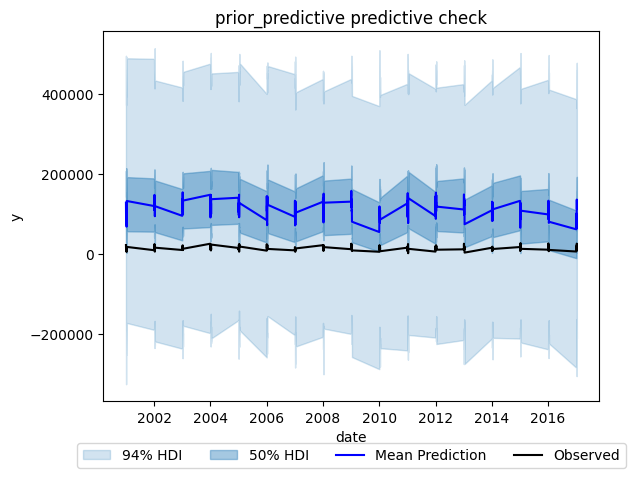

In [18]:
# Generate prior predictive samples
mmm.sample_prior_predictive(x, y, samples=2_000)

fig, ax = plt.subplots()
mmm.plot_prior_predictive(ax=ax, original_scale=True)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=4);

In [23]:
# Make sure to check https://github.com/jax-ml/jax?tab=readme-ov-file#installation on registering my gpu for this

mmm.fit(X=x, y=y, chains=4, target_accept=0.85, nuts_sampler="blackjax", random_seed=rng)

Running window adaptation


There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

Inference data with groups:
	> posterior
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data
	> fit_data

my model has divergences that need to be addessed. Read more on how I could have chosen better parameters.

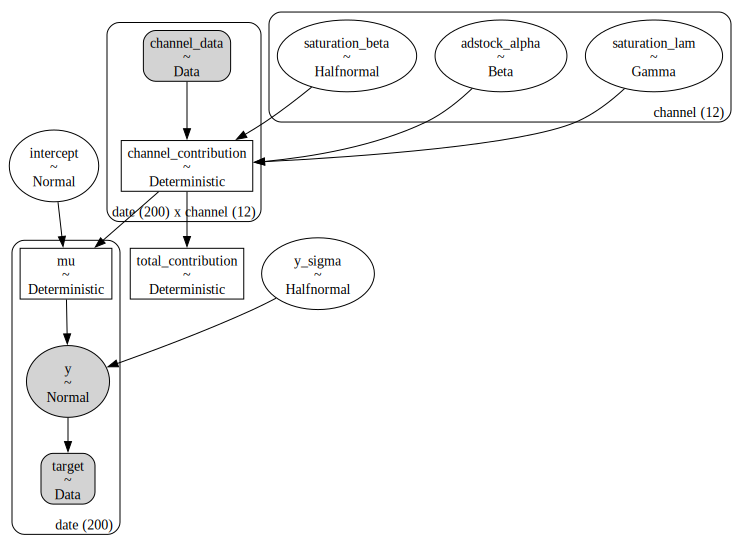

In [27]:
mmm.graphviz()